In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

#### 1. Data Exploration and Preprocessing

In [2]:
data=pd.read_csv("adult_with_headers.csv")
data.head()

,age,workclass,fnlwgt,education,education_num,marital_status,occupation,relationship,race,sex,capital_gain,capital_loss,hours_per_week,native_country,income
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32561 entries, 0 to 32560
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   age             32561 non-null  int64 
 1   workclass       32561 non-null  object
 2   fnlwgt          32561 non-null  int64 
 3   education       32561 non-null  object
 4   education_num   32561 non-null  int64 
 5   marital_status  32561 non-null  object
 6   occupation      32561 non-null  object
 7   relationship    32561 non-null  object
 8   race            32561 non-null  object
 9   sex             32561 non-null  object
 10  capital_gain    32561 non-null  int64 
 11  capital_loss    32561 non-null  int64 
 12  hours_per_week  32561 non-null  int64 
 13  native_country  32561 non-null  object
 14  income          32561 non-null  object
dtypes: int64(6), object(9)
memory usage: 3.7+ MB


In [4]:
data.isnull()

,age,workclass,fnlwgt,education,education_num,marital_status,occupation,relationship,race,sex,capital_gain,capital_loss,hours_per_week,native_country,income
0,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32556,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
32557,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
32558,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
32559,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False


In [5]:
# Check for missing values in the dataset
# This returns the count of null values for each column
data.isnull().sum()

age               0
workclass         0
fnlwgt            0
education         0
education_num     0
marital_status    0
occupation        0
relationship      0
race              0
sex               0
capital_gain      0
capital_loss      0
hours_per_week    0
native_country    0
income            0
dtype: int64

In [6]:
data.isnull().values.any()
# if any null value in the data set it returns True
#no missing values so it prints false

np.False_

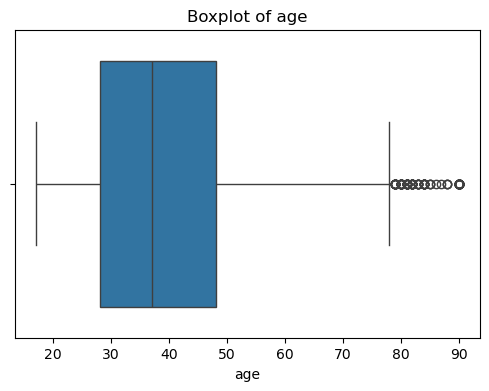

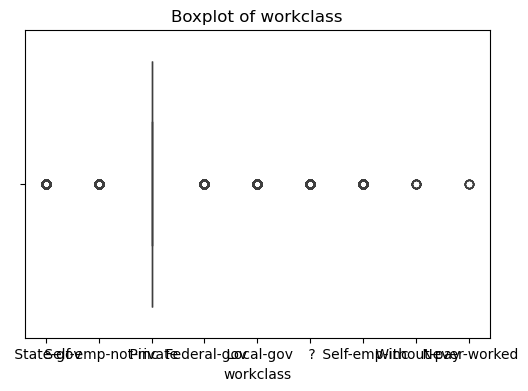

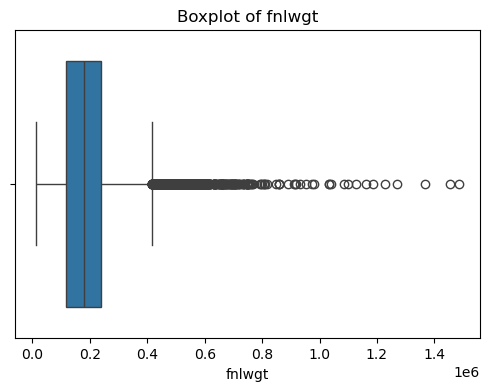

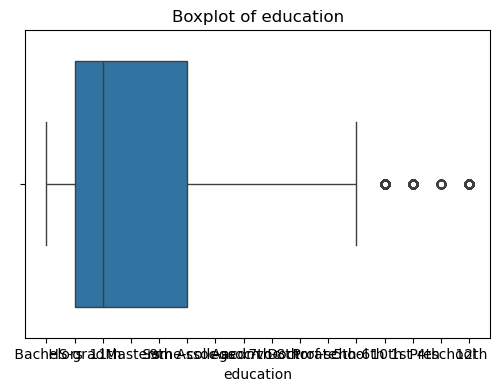

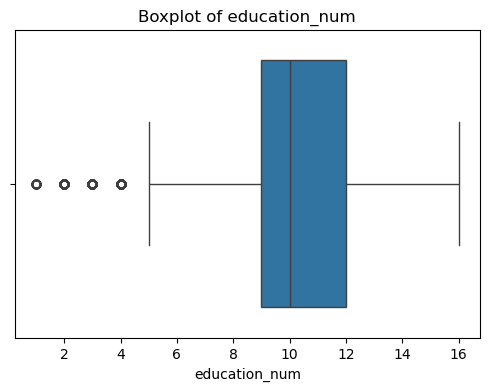

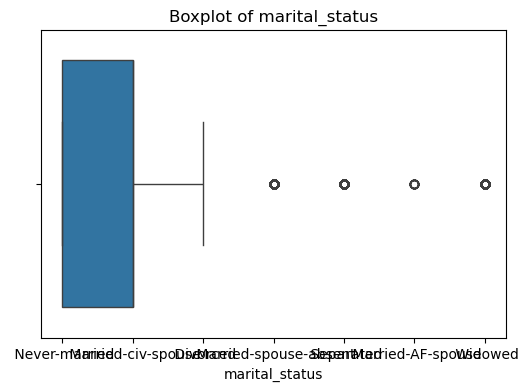

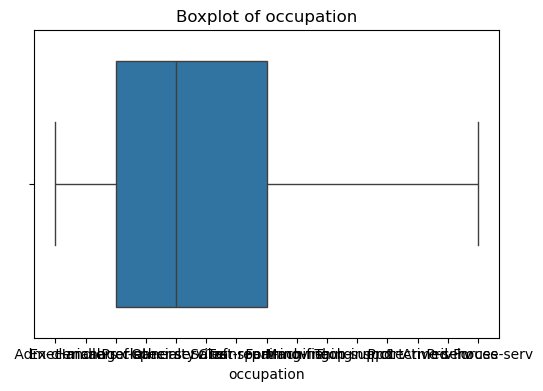

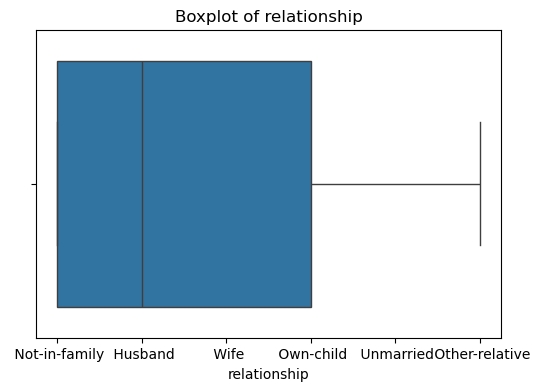

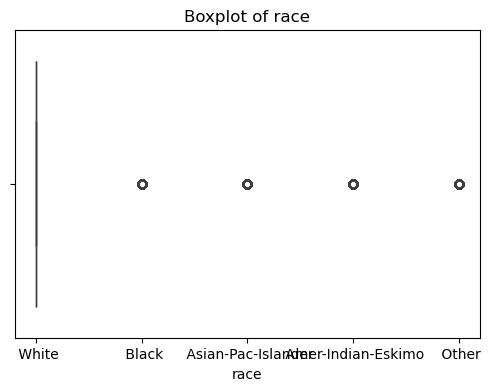

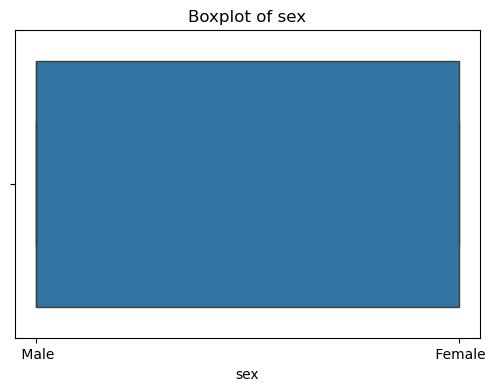

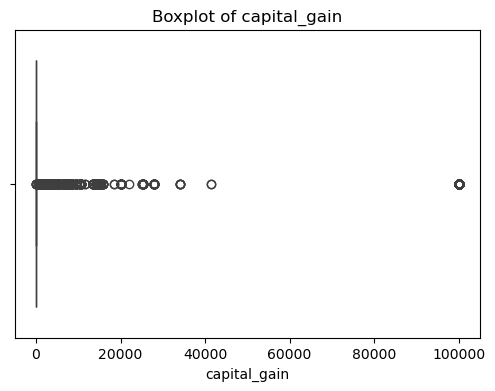

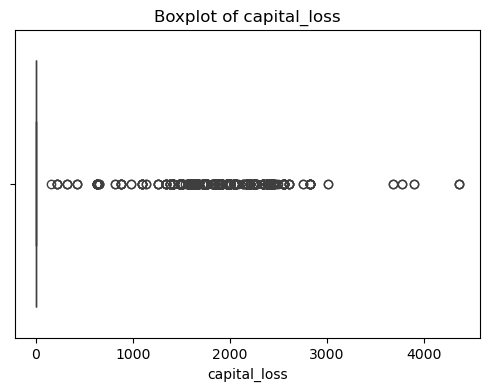

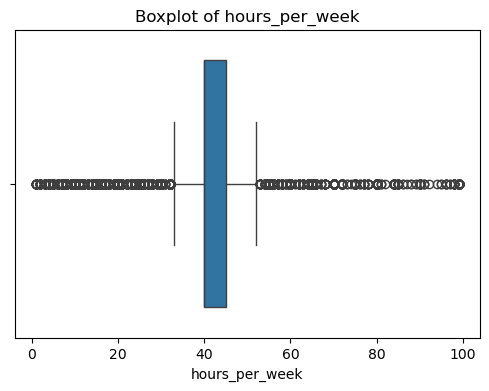

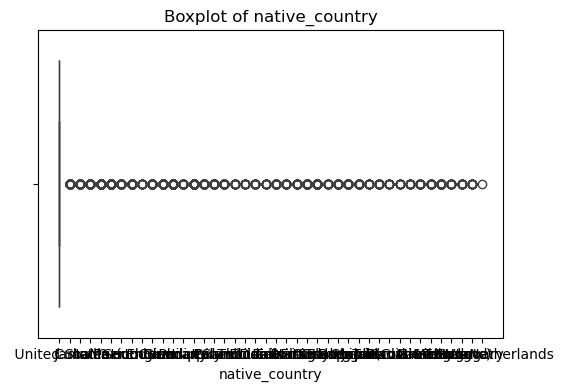

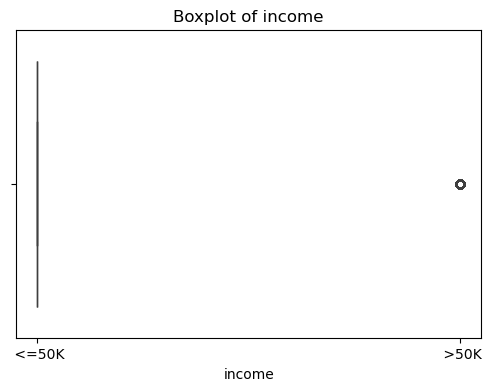

In [7]:
for col in data:
    plt.figure(figsize=(6,4))
    sns.boxplot(x=data[col])
    plt.title(f'Boxplot of {col}')
plt.show()
# Dots outsize the whiskers are outliers

In [8]:
# Identifing numerical columns
data1 = data.select_dtypes(include=['int64', 'float64']).columns
print(data1)

Index(['age', 'fnlwgt', 'education_num', 'capital_gain', 'capital_loss',
       'hours_per_week'],
      dtype='object')


In [9]:
data_imputed = data.copy()

# Only process numeric columns
numeric_cols = data_imputed.select_dtypes(include=['int64', 'float64']).columns

for col in numeric_cols:  # Only iterate through numeric columns
    Q1 = data_imputed[col].quantile(0.25)
    Q3 = data_imputed[col].quantile(0.75)
    IQR = Q3 - Q1

    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    median = data_imputed[col].median()

    data_imputed.loc[(data_imputed[col] < lower_bound) | (data_imputed[col] > upper_bound), col] = median

data_imputed

,age,workclass,fnlwgt,education,education_num,marital_status,occupation,relationship,race,sex,capital_gain,capital_loss,hours_per_week,native_country,income
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,0,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,40,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32556,27,Private,257302,Assoc-acdm,12,Married-civ-spouse,Tech-support,Wife,White,Female,0,0,38,United-States,<=50K
32557,40,Private,154374,HS-grad,9,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,0,0,40,United-States,>50K
32558,58,Private,151910,HS-grad,9,Widowed,Adm-clerical,Unmarried,White,Female,0,0,40,United-States,<=50K
32559,22,Private,201490,HS-grad,9,Never-married,Adm-clerical,Own-child,White,Male,0,0,40,United-States,<=50K


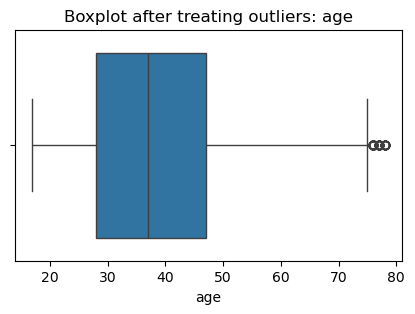

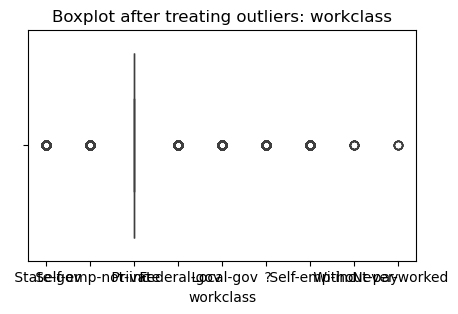

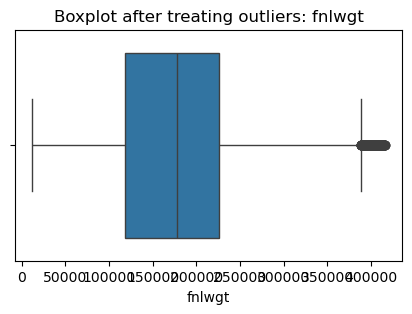

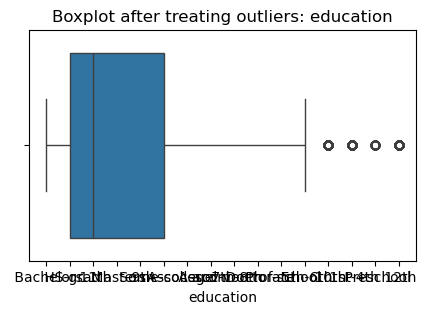

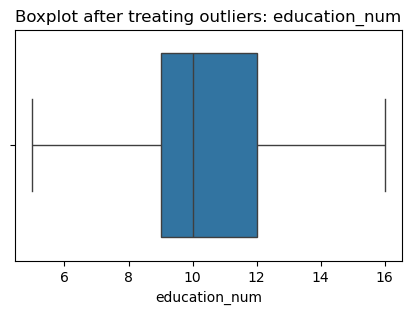

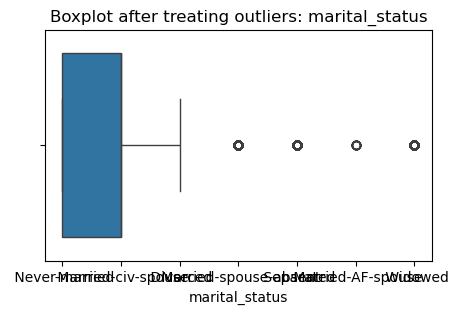

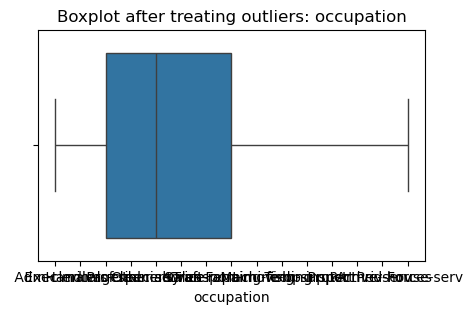

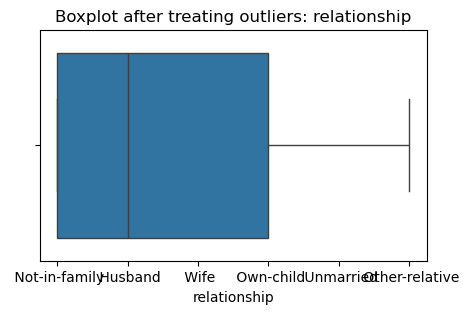

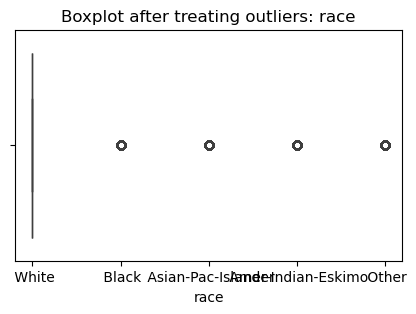

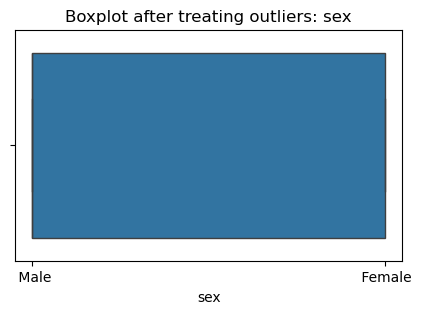

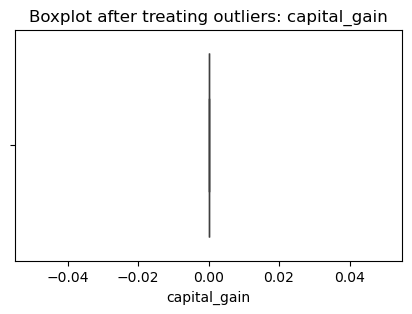

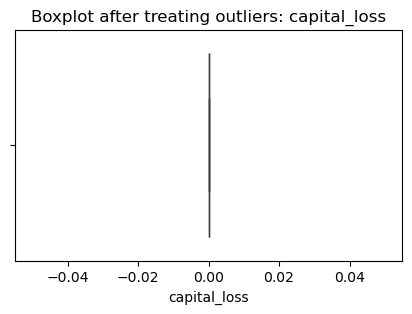

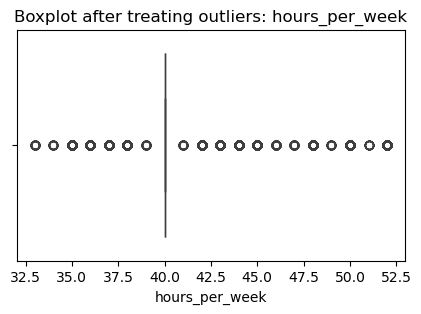

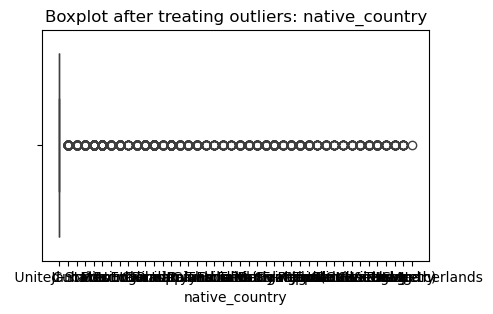

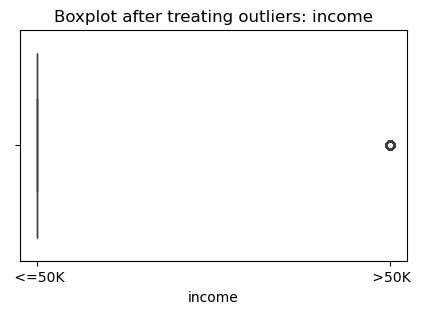

In [10]:
# after treating the outliers
for col in data:
    plt.figure(figsize=(5,3))
    sns.boxplot(x=data_imputed[col])
    plt.title(f'Boxplot after treating outliers: {col}')
    plt.show()

##### Statistical summary

In [11]:
stat_summary=pd.DataFrame({
    'Mean':data[data1].mean(),
    'Median':data[data1].median(),
    'standard_Deviation':data[data1].std(),
    'IQR': data[data1].quantile(0.75) - data[data1].quantile(0.25)
})

print(stat_summary)

                         Mean    Median  standard_Deviation       IQR
age                 38.581647      37.0           13.640433      20.0
fnlwgt          189778.366512  178356.0       105549.977697  119224.0
education_num       10.080679      10.0            2.572720       3.0
capital_gain      1077.648844       0.0         7385.292085       0.0
capital_loss        87.303830       0.0          402.960219       0.0
hours_per_week      40.437456      40.0           12.347429       5.0


In [12]:
# Impute missing categorical values with mode
for col in data.select_dtypes(include='object').columns:
    data[col] = data[col].fillna(data[col].mode()[0])

In [13]:
# Impute missing numeric values with median
for col in data.select_dtypes(include=['int64', 'float64']).columns:
    data[col] = data[col].fillna(data[col].median())

In [14]:
data.isnull().sum()

age               0
workclass         0
fnlwgt            0
education         0
education_num     0
marital_status    0
occupation        0
relationship      0
race              0
sex               0
capital_gain      0
capital_loss      0
hours_per_week    0
native_country    0
income            0
dtype: int64

#### Scaling Techniques

In [15]:
from sklearn.preprocessing import StandardScaler, MinMaxScaler, LabelEncoder
from sklearn.ensemble import IsolationForest



In [16]:
num_cols = data.select_dtypes(include=['int64', 'float64']).columns

In [17]:
# Standard Scaling
scaler_standard = StandardScaler()
data_standard_scaled = data.copy()
data_standard_scaled[num_cols] = scaler_standard.fit_transform(data[num_cols])
#scenario
#- Centers data around mean=0, std=1.
#- Best for algorithms assuming Gaussian distribution (e.g., Logistic Regression, SVM, PCA).

In [18]:
# Min-Max Scaling
scaler_minmax = MinMaxScaler()
data_minmax_scaled = data.copy()
data_minmax_scaled[num_cols] = scaler_minmax.fit_transform(data[num_cols])

# Scales data to [0,1] range.
#- Best for algorithms sensitive to magnitude or that use distance metrics (e.g., KNN, Neural Networks).

In [19]:
print("\nStandard Scaling and Min-Max Scaling applied successfully.\n")


Standard Scaling and Min-Max Scaling applied successfully.



#### 2.Encoding Techniques

In [20]:
# Separate categorical columns
cat_cols = data.select_dtypes(include='object').columns

In [21]:
# Apply One-Hot Encoding to columns with <5 categories
low_card_cols = [col for col in cat_cols if data[col].nunique() < 5]
data_onehot = pd.get_dummies(data, columns=low_card_cols, drop_first=True)

In [22]:
# Apply Label Encoding to columns with >=5 categories
high_card_cols = [col for col in cat_cols if data[col].nunique() >= 5]
le = LabelEncoder()
for col in high_card_cols:
    data_onehot[col] = le.fit_transform(data_onehot[col])

In [23]:
print("\nEncoding applied successfully.\n")


Encoding applied successfully.



In [24]:
print("pros and cons of one-Hot Encoding and Label Encoding")
print("\n One-Hot Encoding\n")
print('''pros: preserves category meaning\ncons: Increases dimensionality''')
print("\n Label Encoding \n")
print(''' pros:  Compact representation.\n cons:May introduce ordinal relationships where none exist.''')

pros and cons of one-Hot Encoding and Label Encoding

 One-Hot Encoding

pros: preserves category meaning
cons: Increases dimensionality

 Label Encoding 

 pros:  Compact representation.
 cons:May introduce ordinal relationships where none exist.


#### 3.Featuring engineering

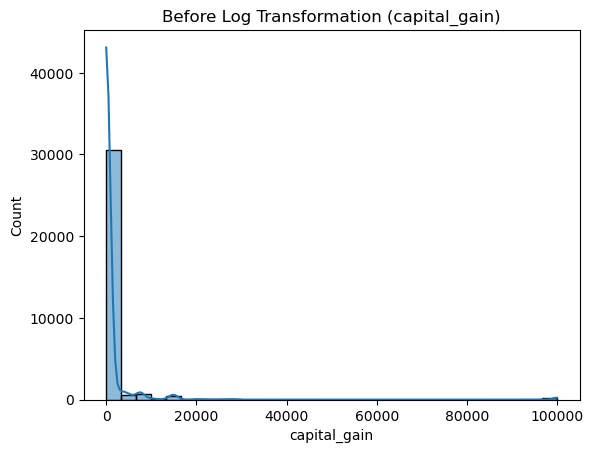

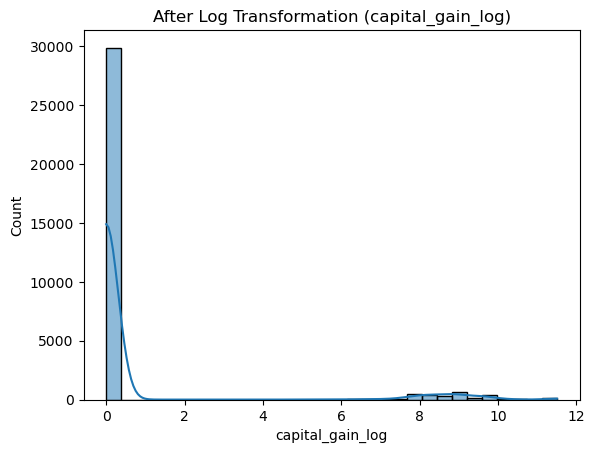

In [25]:
# Example new feature 1: Age group
data_onehot['age_group'] = pd.cut(data_onehot['age'], bins=[0, 25, 45, 65, 100], labels=['Young', 'Adult', 'Middle-Aged', 'Senior'])

# Example new feature 2: Working hours category
data_onehot['work_category'] = pd.cut(data_onehot['hours_per_week'], bins=[0, 20, 40, 60, 100],
                                    labels=['Part-time', 'Full-time', 'Overtime', 'Extreme'])

# Log transformation for skewed numerical feature
# Example: capital.gain
sns.histplot(data_onehot['capital_gain'], bins=30, kde=True)
plt.title("Before Log Transformation (capital_gain)")
plt.show()

data_onehot['capital_gain_log'] = np.log1p(data_onehot['capital_gain'])

sns.histplot(data_onehot['capital_gain_log'], bins=30, kde=True)
plt.title("After Log Transformation (capital_gain_log)")
plt.show()


In [26]:
print("""
Rationale:
- Age group and work category can help model understand lifestyle and working trends.
- Log transformation reduces skewness, stabilizes variance.
""")


Rationale:
- Age group and work category can help model understand lifestyle and working trends.
- Log transformation reduces skewness, stabilizes variance.



#### 4.Feature Selection

In [27]:
# --- Isolation Forest for Outlier Detection ---
iso = IsolationForest(contamination=0.02, random_state=42)
yhat = iso.fit_predict(data_onehot[num_cols])
mask = yhat != -1
data_cleaned = data_onehot[mask]

print(f"\nRemoved {len(data_onehot) - len(data_cleaned)} outliers using Isolation Forest.\n")


Removed 652 outliers using Isolation Forest.



In [ ]:

!pip install ppscore

In [ ]:
import ppscore as pps

In [ ]:
# --- PPS (Predictive Power Score) ---
import
pps_matrix = pps.matrix(data_cleaned)
pps_matrix.sort_values(by='ppscore', ascending=False, inplace=True)
print("\nTop 10 PPS Scores:\n", pps_matrix.head(10))

In [ ]:
# --- Correlation Matrix ---
corr_matrix = data_cleaned.corr(numeric_only=True)
plt.figure(figsize=(10, 6))
sns.heatmap(corr_matrix, cmap='coolwarm')
plt.title("Correlation Matrix")
plt.show()

In [ ]:
print("\nFeature selection completed successfully.\n")

In [ ]:
print("""
Comparison:
- PPS detects nonlinear relationships.
- Correlation only captures linear relationships.
""")

In [ ]:
# Final cleaned data
print("Final dataset shape after cleaning:", df_cleaned.shape)
df_cleaned.head()